In [12]:
import pandas as pd
import numpy as np
from abc import ABC,abstractmethod
import random
import math
class regression:
    _x=np.array([])
    _y=np.array([])
    
    @staticmethod
    def __ssCalculator(x,y):
        ssValue=0
        for index in range(np.size(x)):
            ssValue+=x[index]*y[index]
        return ssValue
    
    @staticmethod
    def train_test_split(x,y,test_size=0.25):
        ziped= list(zip(x,y))
        random.shuffle(ziped)
        test_size=int(np.size(y)*test_size);
        test_zip=ziped[0:test_size]
        train_zip=ziped[test_size:]
        train_x,train_y=zip(*train_zip)
        test_x,test_y=zip(*test_zip)
        return ([train_x,test_x,train_y,test_y])
                 
                 
    @abstractmethod
    def predict(self):
        pass
    
    
class linera_regression(regression):
    __ss_x,__ss_xy,__mean_x,__mean_y,__n,__m,__c=None,None,None,None,None,None,None
    def __init__(self,x,y):
        if(np.ndim(x)==np.ndim(y)==1 and np.size(x)==np.size(y)):
            self._x=x
            self._y=y
        else:
            raise Exception("invalid input")
    def regressor(self):
        self.__ss_x= self._regression__ssCalculator(self._x,self._x)
        self.__ss_xy = self._regression__ssCalculator(self._x,self._y)
        self.__mean_x=np.mean(self._x)
        self.__mean_y=np.mean(self._y)     
        self.__n=np.size(self._x)    #number of x
        self.__m=(self.__ss_xy-(self.__mean_x*self.__mean_y*self.__n))/(self.__ss_x-(self.__mean_x*self.__mean_x*self.__n))  #slope
        self.__c=(self.__mean_y-(self.__m*self.__mean_x))   #intercept
        
    def get_slope(self):
        return self.__m
    def get_intercept(self):
        return self.__c
    
    def predict(self,x):
        return (self.__m*x)+self.__c
    
    def t_value(self,df=1):
        y_predict=[self.predict(i) for i in self._x]
        error=[self._y[i]-y_predict[i] for i in range(self.__n)]
        ss_res=self._regression__ssCalculator(error,error)
        ms_res=ss_res/(self.__n-df)
        s_xx=self.__ss_x-(self.__n*self.__mean_x*self.__mean_x)

        return self.__m/math.sqrt(ms_res/s_xx)
        

In [13]:
# import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt

In [14]:
data=pd.read_csv("C:\\Users\\abhib\\Downloads\\archive\\Experience-Salary.csv")
data

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236
...,...,...
995,22.161741,24.666502
996,32.266497,24.160270
997,17.039030,19.903797
998,25.222124,21.974413


In [15]:
x_train,x_test,y_train,y_test=linera_regression.train_test_split(data['exp(in months)'],data['salary(in thousands)'])
model=linera_regression(x_train,y_train)
model.regressor()
print(model.get_slope())
print(model.get_intercept())

0.8289437848107041
5.092861071310775


In [16]:
model.t_value(2)

38.256403804575065

In [17]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

In [18]:
model1.fit(np.array(x_train).reshape(np.size(y_train),-1),y_train)
# print(np.array(y_test))

LinearRegression()

In [19]:
# print([model.predict(i) for i in y_test])
model1.intercept_

5.092861071310466

In [20]:
model1.coef_

array([0.82894378])

In [21]:
model1_predict=model1.predict(np.array(x_test).reshape(np.size(y_test),-1))

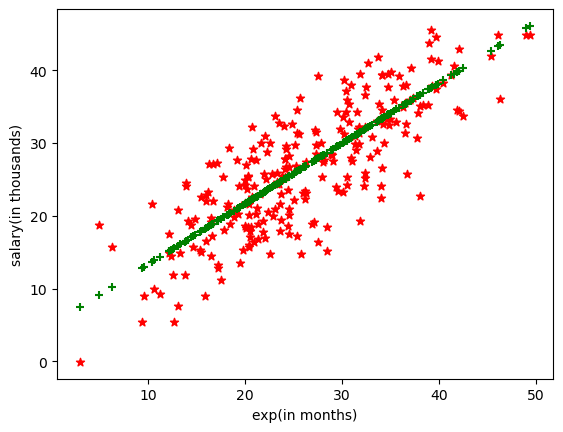

In [22]:
plt.scatter(x_test,y_test,marker="*",color='r')
plt.scatter(x_test,[model.predict(i) for i in x_test],marker="+",color='g')
# plt.scatter(x_test,model1_predict,marker="+",color='b')

plt.xlabel('exp(in months)')
plt.ylabel('salary(in thousands)')
plt.show()

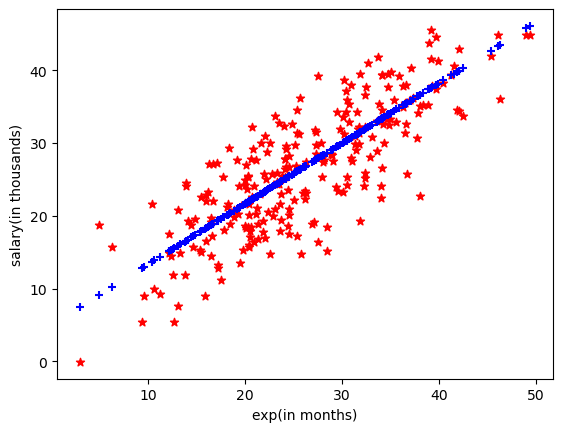

In [23]:
plt.scatter(x_test,y_test,marker="*",color='r')
# plt.scatter(x_test,[model.predict(i) for i in x_test],marker="+",color='g')
plt.scatter(x_test,model1_predict,marker="+",color='b')

plt.xlabel('exp(in months)')
plt.ylabel('salary(in thousands)')
plt.show()

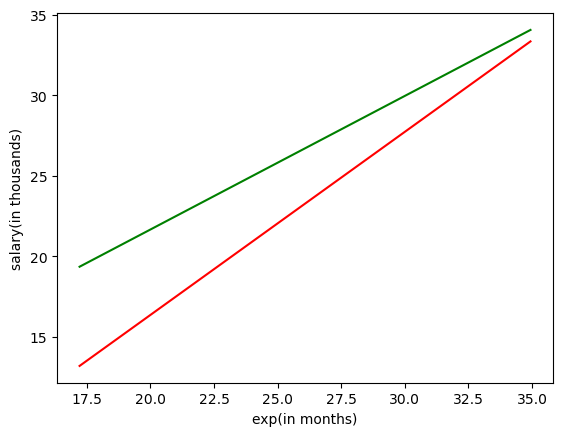

In [24]:
plt.plot([x_test[0],x_test[np.size(y_test)-1]],[y_test[0],y_test[np.size(y_test)-1]],color='r')
plt.plot([x_test[0],x_test[np.size(y_test)-1]],[model.predict(x_test[0]),model.predict(x_test[np.size(y_test)-1])],color='g')
# plt.plot([x_test[0],x_test[np.size(y_test)-1]],[model1_predict[0],model1_predict[np.size(y_test)-1]],color='b')
plt.xlabel('exp(in months)')
plt.ylabel('salary(in thousands)')
plt.show()

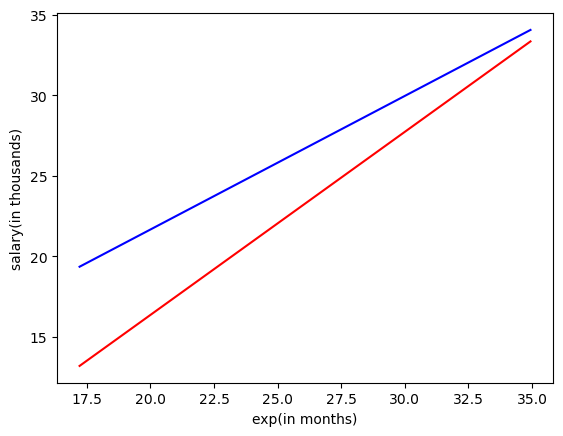

In [25]:
plt.plot([x_test[0],x_test[np.size(y_test)-1]],[y_test[0],y_test[np.size(y_test)-1]],color='r')
# plt.plot([x_test[0],x_test[np.size(y_test)-1]],[model.predict(x_test[0]),model.predict(x_test[np.size(y_test)-1])],color='g')
plt.plot([x_test[0],x_test[np.size(y_test)-1]],[model1_predict[0],model1_predict[np.size(y_test)-1]],color='b')
plt.xlabel('exp(in months)')
plt.ylabel('salary(in thousands)')
plt.show()